# Training Data

In [100]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=100,n_features=2,
                centers=[[0,0],[5,5]],
                cluster_std=1,random_state=42)

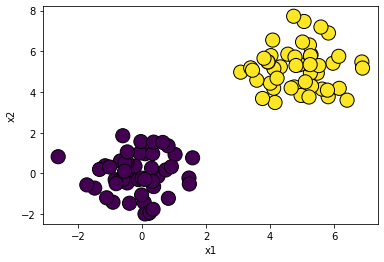

In [101]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,s=200,edgecolors='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Measure distance

In [3]:
import numpy as np
def distance(x1,x2,q=2):
    dist = 0
    dist = np.sum(np.absolute(x1-x2)**q,axis=0)**(1/q)
    return dist

In [111]:
distance(np.array([2,0]),np.array([5,0]),q=2)

3.0

In [112]:
x1 = np.arange(0,10).reshape(-1,1)
x2 = np.arange(-5,15,2).reshape(-1,1)

In [113]:
distance(x1,x2)

array([9.21954446])

In [122]:
newExample = np.array([0,5]).reshape(-1,1)

In [131]:
distance(newExample,X.T).shape

(100,)

In [139]:
print(np.min(distance(newExample,X.T)))
X[np.argmin(distance(newExample,X.T))]

0.32439142774701757


array([-0.10747812,  4.69393097])

In [144]:
newPoint = np.array([0,5]).reshape(-1,1)

In [252]:
from scipy import stats as st
def predict(X,y,newPoint,k):
    distances = distance(newPoint,X.T)
    return st.mode(y[np.argsort(distances)][:k])[0][0]

In [209]:
k = np.arange(1,32,2)

In [210]:
k

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])

# Visualizing the data line

In [214]:
knn_3,X_visual = predict(X,y,newPoint,3)

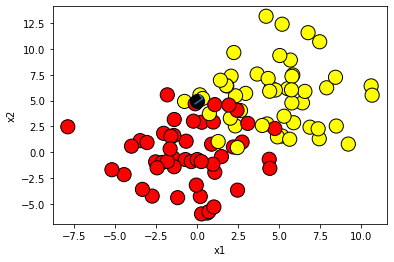

In [220]:
def draw_decesion_boundry(X,y,k):
    

-9.859235312269233 -7.962706743802679
12.65855770363159 15.160507499768856


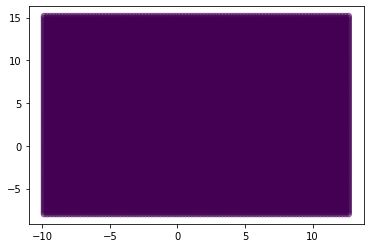

In [253]:
Xmin,ymin = np.min(X,axis=0)-2
Xmax,ymax = np.max(X,axis=0)+2
print(Xmin,ymin)
print(Xmax,ymax)


tx1 = np.linspace(Xmin,Xmax,100)
tx2 = np.linspace(ymin,ymax,100)

xx1,xx2 = np.meshgrid(tx,ty) 
xx1 = xx1.flatten()
xx2 = xx2.flatten()


grid_predictions = np.zeros_like(xx1)
grid_points = np.column_stack((xx1,xx2))


for i in range(grid_points.shape[0]):
    grid_predictions[i] = predict(X,y,grid_points[i],3)
    
plt.scatter(xx1,xx2,c = grid_predictions,alpha=0.5)

In [245]:
gp = grid_points[0].reshape(-1,1)

In [247]:
predict(X,y,gp,3)

0

In [249]:
grid_points.shape

(10000, 2)

# K-NN Class for Classification

In [92]:
from scipy import stats as st
class KNearestNeighbours():
    
    def __init__(self,k):
        self.k = k
        
    def distance_calculator(self,x1,x2,q = 2):
        return np.sum((np.abs(x1 - x2)**q),axis = 1)**(1/q)
    
    def fit(self,X,y):
        self._X = X
        self._y = y
        
    def predict(self,newPoint):
        distances = self.distance_calculator(self._X,newPoint)
        
        nearest_neighbour_indices = np.argsort(distances)
        
        nearest_neighbours = y[nearest_neighbour_indices][:self.k]
        
        return st.mode(nearest_neighbours)[0]

In [93]:
knn = KNearestNeighbours(k=3)

In [94]:
q = np.array([[0,2],[1,2],[2,2],[3,4]])
a = np.array([0,5])

knn.distance_calculator(q,a)

array([3.        , 3.16227766, 3.60555128, 3.16227766])

In [95]:
knn.fit(X,y)

In [108]:
newPoint = np.array([4,3])
knn.predict(newPoint)

array([1])

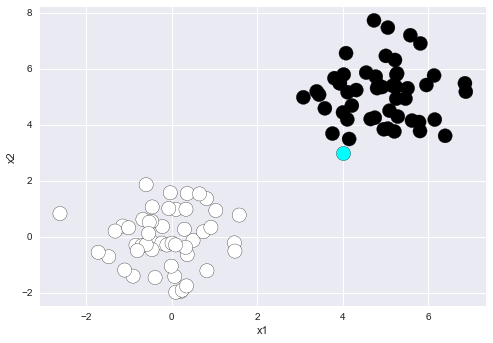

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=y,s=200,edgecolors='k')
plt.scatter(newPoint[0],newPoint[1],c='cyan',s=200,edgecolors='k')
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Plotting decesion boundaries

In [112]:
def plot_decesion_boundry(X,y):
    knn.predict(X,newPoint)
    h = 0.02
    